Links:
- https://github.com/hardmaru/WorldModelsExperiments
- http://blog.otoro.net//2018/06/09/world-models-experiments/


In [3]:
%matplotlib inline
import numpy as np
import importlib
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import gym
import torch
import torch.nn as nn
from PIL import Image
import PIL
from torchsummary import summary

In [4]:
env = gym.make('MountainCar-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Mountain Car Environment

In [5]:
state = env.reset()
ims = []
for i in range(1000):
    action = env.action_space.sample()
    state, r, done, _ = env.step(action)
    im = env.render(mode='rgb_array')
    ims.append(im)
env.close()

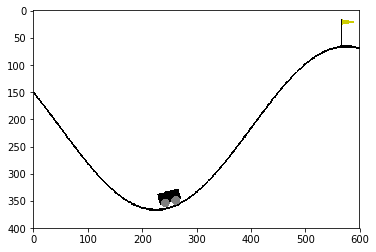

In [6]:
plt.imshow(ims[1])

In [7]:
resized_ims = [Image.fromarray(i).resize((64, 64), Image.BILINEAR) for i in ims]

In [8]:
resized_ims = [np.array(i) for i in resized_ims]

In [9]:
resized_ims = np.array(resized_ims)

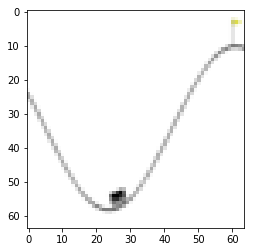

In [10]:
plt.imshow(resized_ims[1])

In [29]:
import vae
VAE = importlib.reload(vae).VAE

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = VAE().to(device)

In [31]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 31, 31]             196
              ReLU-2            [-1, 4, 31, 31]               0
            Conv2d-3            [-1, 8, 14, 14]             520
              ReLU-4            [-1, 8, 14, 14]               0
            Conv2d-5             [-1, 16, 6, 6]           2,064
              ReLU-6             [-1, 16, 6, 6]               0
            Conv2d-7             [-1, 32, 2, 2]           8,224
              ReLU-8             [-1, 32, 2, 2]               0
            Linear-9                   [-1, 32]           4,128
           Linear-10                   [-1, 32]           4,128
           Linear-11                  [-1, 128]           4,224
          Reshape-12            [-1, 128, 1, 1]               0
  ConvTranspose2d-13             [-1, 16, 5, 5]          51,216
             ReLU-14             [-1, 1

In [13]:
var = torch.from_numpy(resized_ims)
var = var.reshape((1000, 3, 64, 64)).float()

original, decoded, encoded, z, mu, logvar = model.forward(var)

In [14]:
model.kl_loss(logvar=logvar, mu=mu)

tensor(16., grad_fn=<MeanBackward1>)

In [15]:
model.reconstuction_loss(original, decoded)

tensor(776552896., grad_fn=<MeanBackward1>)

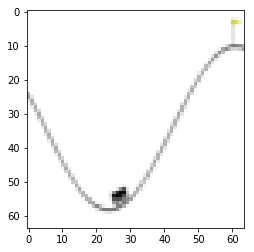

In [16]:
plt.imshow(resized_ims[0])